<a href="https://colab.research.google.com/github/KhaledZakarie/HandWritten-Grauation-Project/blob/main/28th%20Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**##Imports##**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**##Read Image &  Resize##**

(677, 749, 3)
(677, 749, 3)


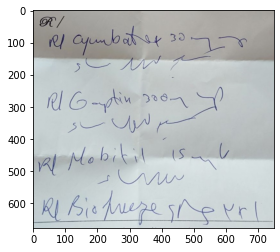

In [5]:
img = cv2.imread('/content/IMG-2.jpg') #read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #imageFile is read with imread(), the order of colors is BGR, On the other hand, in Pillow, the order of colors is GB 

h, w, c = img.shape #height, width, channels 
print(img.shape)
if w > 1000: # width must longer than 1000
    new_w = 1000
    ar = w/h #to get the new height
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
print(img.shape)
plt.imshow(img);

**##Threshold Function##**

In [6]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #ret,thresh = cv2.threshold(img_gray, 120,255,cv2.THRESH_BINARY_INV)
    thresh = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    plt.imshow(thresh, cmap='gray')
    return thresh

**##Calling Threashold##**

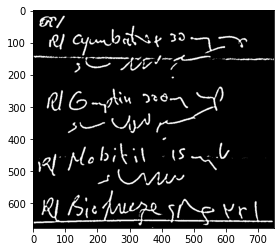

In [7]:
blurred = cv2.GaussianBlur(img.copy(), (17, 17), 0)
thresh_img = thresholding(blurred);

**##Line dilation##**

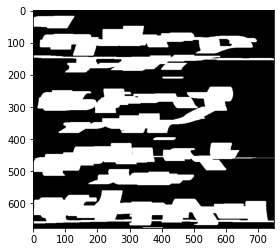

In [8]:
kernel = np.ones((1,60), np.uint8) #matrix of ones on shape 3*85 in dataType unsigned int 
#print(kernel)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1) #iteration is num of steps of kernal
plt.imshow(dilated, cmap='gray');

**##Get Contours##**

In [9]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines_N = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h) #1 mean sort vertically but 0 mean sort horizontally
print(sorted_contours_lines_N[0].shape)

(298, 1, 2)


**##Contours to (x, y, w, h)##**

In [10]:
sorted_contours_lines = []
for ctr in sorted_contours_lines_N:
  x,y,w,h = cv2.boundingRect(ctr)
  sorted_contours_lines.append((x,y,w,h))

**##Mean Hight Of Lines##**

In [11]:
def mean_hight_of_lines(sorted_contours_lines):
  sum_of_heights = 0
  for ctr in sorted_contours_lines:
      x,y,w,h = ctr  
      sum_of_heights += h 
  mean_of_heights = sum_of_heights/len(sorted_contours_lines)
  return mean_of_heights

**##Mean Space Between Lines##**

In [12]:
def mean_space_between_lines(sorted_contours_lines):
  sum_of_spaces = 0
  i=1
  for ctr in sorted_contours_lines:
    if(i < len(sorted_contours_lines)):
      x,y,w,h = ctr
      nx,ny,nw,nh = sorted_contours_lines[i]
      #sum_of_spaces += (y-(ny+nh))
      sum_of_spaces += (ny - (y+h))
      i +=1
  mean_of_spaces = sum_of_spaces / (len(sorted_contours_lines)-1)
  return mean_of_spaces

# **##First Calling Of Mean Hight & Mean Space**(Before Delete Noise)**##**

In [13]:
mean_of_heights = mean_hight_of_lines(sorted_contours_lines)
mean_of_spaces = mean_space_between_lines(sorted_contours_lines)

**##h = Mean_h##**

0
21
0
14
0
172
0


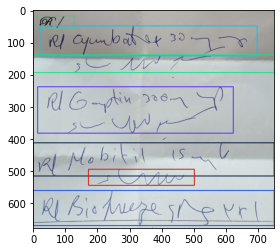

In [14]:
img4 = img.copy()
sorted_contours_lines_mean = []
for ctr in sorted_contours_lines:
    #ctr= sorted_contours_lines[4]
    x,y,w,h = ctr
    if(h < int(mean_of_heights/2)):
        continue
    #if(h > int(2 * mean_of_heights)):
     #   h=int(mean_of_heights)
      #  ny= (y+h) + int(mean_of_spaces)
        #print(f"y {y} h {y+h} ny {ny}")
       # cv2.rectangle(img4, (x,ny), (x+w, ny+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
        #sorted_contours_lines_mean.append((x,ny,w,h))
    print(x)
    cv2.rectangle(img4, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
    sorted_contours_lines_mean.append((x,y,w,h))
    #print(f"h {h} mean {mean_of_spaces}")
plt.imshow(img4);

# **##Second Calling Of Mean Hight & Mean Space**(After Delete Noise)**##**

In [15]:
mean_of_heights = mean_hight_of_lines(sorted_contours_lines_mean)
mean_of_spaces = mean_space_between_lines(sorted_contours_lines_mean)

**##Print Line##**

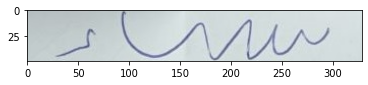

In [16]:
img3 = img.copy()  
#x,y,w,h = cv2.boundingRect(sorted_contours_lines[1])
LineNum=5
x, y, w, h = sorted_contours_lines_mean[LineNum]
#x=sorted_contours_lines_norm[LineNum][0]
#y=sorted_contours_lines_norm[LineNum][1]
#w=sorted_contours_lines_norm[LineNum][2]
#h=sorted_contours_lines_norm[LineNum][3]
plt.imshow(img3[y:y+h, x:x+w])

**##Crop Lines##**

In [17]:
crop_img = img.copy()
i=0
os.mkdir('/content/Lines')
for ctr in sorted_contours_lines_mean:
    #x=ctr[0]
    #=ctr[1]
    #w=ctr[2]
    #h=ctr[3]
    x,y,w,h = ctr
    #x,y,w,h = cv2.boundingRect(ctr)
    line = crop_img[y:h+y, x:w+x]
    print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
    cv2.imwrite(f"/content/Lines/Line_{i}.jpg", line)
    i+=1


0 18 129 39
21 49 675 93
0 139 749 55
14 238 608 144
0 412 749 103
172 494 329 50
0 560 749 109


**##Create Lines.zip##**

In [18]:
!zip -r /content/Lines.zip /content/Lines/ #path+name  #path⅖

  adding: content/Lines/ (stored 0%)
  adding: content/Lines/Line_1.jpg (deflated 1%)
  adding: content/Lines/Line_0.jpg (deflated 6%)
  adding: content/Lines/Line_2.jpg (deflated 2%)
  adding: content/Lines/Line_4.jpg (deflated 1%)
  adding: content/Lines/Line_3.jpg (deflated 1%)
  adding: content/Lines/Line_5.jpg (deflated 3%)
  adding: content/Lines/Line_6.jpg (deflated 1%)


**##Word dilation##**

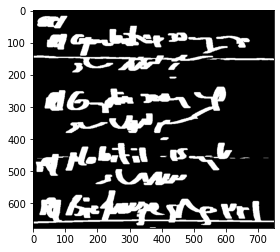

In [19]:
kernel = np.ones((1,16), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

**##Space between words##**

In [20]:
def spaceBetweenWords(word1, word2):
  x, y, w, h = cv2.boundingRect(word1)
  x2, y2, w2, h2 = cv2.boundingRect(word2)
  space=x2-(w+x)
  print(f"x1 {x} x2 {x2}")
  return space


Average X

In [40]:
avgX = 0
sumX = 0
for line in sorted_contours_lines:
  sumX += line[0]
avgX = sumX/len(sorted_contours_lines)
print(avgX *1.4)

185.22


**##Word Segmentation##**

In [53]:
img3 = img.copy()
words_list = []
FistWordList = [] # list of the first word for each line
FR=0
for line in sorted_contours_lines_mean:
    sorted_contour_words = []
    if line[0] > (avgX*1.3) :#line[0]=x #if exist more than word in exact line  لو الاكس كبيره يبقي السطر بادئ مش من اول السطر فمش عايزه
      continue
    FirstWordInLine = 0
    x, y, w, h = line
    
    # to fit the line from the paper (show the line only)
    cropped_line = dilated2[y:h+y, x:w+x]
    (cnt, heirarchy) = cv2.findContours(cropped_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words_beforeFilter = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0]) #0 mean sort horizontally but 1 mean sort vertically  
    
    for word in sorted_contour_words_beforeFilter:
        if cv2.contourArea(word) < 400:
            continue
        sorted_contour_words.append(word)

    for word in sorted_contour_words:
        if FR==0 :
          firstR = word
          FR=1

        # to get the space between first 2 words in each line // to calc the avrg space between words
        if (FirstWordInLine == 0) and len(sorted_contour_words)>1:
          spaceBetweenWord = spaceBetweenWords(sorted_contour_words[0], sorted_contour_words[1])
          FistWordList.append(((x, y), word, spaceBetweenWord))
          FirstWordInLine = 1

        elif (FirstWordInLine == 0) and (cv2.contourArea(word) < 3500):
          FistWordList.append(((x, y), word, spaceBetweenWord))
          FirstWordInLine = 1


            
        # x2, y2, w2, h2 = cv2.boundingRect(word)
        # words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        # cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)

# plt.imshow(img3);

x1 22 x2 95
x1 0 x2 122
x1 22 x2 87
x1 9 x2 101
x1 0 x2 101


2593.5
2226.0
7376.5
3019.5
2848.5
23705.0


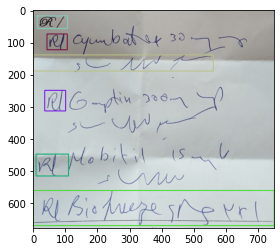

In [54]:
img4 = img.copy()
SameAreaList = []

# to cal the area of R1
AreaR1 = cv2.contourArea(FistWordList[0][1]) #FistWordList[num of word][contours of word] ##contour of first word in list 


if(AreaR1 < (cv2.contourArea(firstR)*2)) :
  for word in FistWordList:
    ##word -> word[0]= contours of line, word[1]=contour of word in the line, word[2]= space between first & second  ######--> FistWordList.append(((x, y), word, spaceBetweenWord))
    print(cv2.contourArea(word[1])) #word[1]=contour of word
    
    #print(word[2])
    if (cv2.contourArea(word[1]) < (AreaR1+(AreaR1*1.5))  ):
      SameAreaList.append(word)
  
    x2, y2, w2, h2 = cv2.boundingRect(word[1])
    
    #word[0][0] = x of line,,,,word[0][1] = y of line
    cv2.rectangle(img4, (word[0][0]+x2, word[0][1]+y2), (word[0][0]+x2+w2, word[0][1]+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)
plt.imshow(img4);

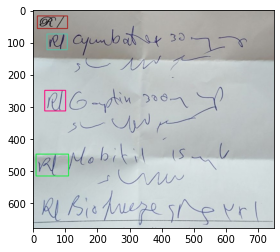

In [55]:
img5 = img.copy()
for word in SameAreaList:
  x2, y2, w2, h2 = cv2.boundingRect(word[1])
  #word is (x, y), word----->(x, y) of line of word ,,, word is contour of words 
  #word[1] = contour of word
  #word[0][0] = x of line,,,,word[0][1] = y of line
  cv2.rectangle(img5, (word[0][0]+x2, word[0][1]+y2), (word[0][0]+x2+w2, word[0][1]+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)
  
plt.imshow(img5);

**##Print Word##**

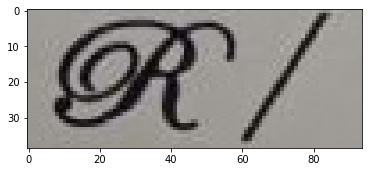

In [25]:
word = words_list[0]
word_img = img[word[1]:word[3], word[0]:word[2]]
plt.imshow(word_img);

**##Crop Words##**

In [26]:
crop_img = img.copy()
i=0
os.mkdir('/content/Words')
for ctr in words_list:
    
    #x,y,w,h = cv2.boundingRect(ctr)
    x=ctr[0]
    y=ctr[1]
    w=ctr[2]
    h=ctr[3]
    word = crop_img[y:h, x:w]
    print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
    cv2.imwrite(f"/content/Words/Word_{i}.jpg", word)
    i+=1


13 18 107 57
43 74 106 123
116 49 408 142
419 70 480 99
482 84 605 135
569 80 674 117
0 139 560 189
122 164 155 194
540 149 749 156
36 249 101 313
101 348 232 382
105 244 313 320
236 321 372 382
334 259 490 305
376 238 600 382
9 447 110 515
101 424 172 499
164 456 197 478
202 423 265 473
245 413 301 479
329 427 356 472
426 429 481 469
484 453 579 498
550 412 619 463
194 511 247 541
256 494 479 544
0 560 749 669
101 574 207 646
584 601 673 648


**##Create Words.zip##**

In [27]:
!zip -r /content/Words.zip /content/Words/ #path+name  #path⅖

  adding: content/Words/ (stored 0%)
  adding: content/Words/Word_4.jpg (deflated 6%)
  adding: content/Words/Word_19.jpg (deflated 8%)
  adding: content/Words/Word_14.jpg (deflated 2%)
  adding: content/Words/Word_12.jpg (deflated 5%)
  adding: content/Words/Word_1.jpg (deflated 7%)
  adding: content/Words/Word_26.jpg (deflated 1%)
  adding: content/Words/Word_13.jpg (deflated 5%)
  adding: content/Words/Word_24.jpg (deflated 15%)
  adding: content/Words/Word_23.jpg (deflated 8%)
  adding: content/Words/Word_10.jpg (deflated 7%)
  adding: content/Words/Word_21.jpg (deflated 10%)
  adding: content/Words/Word_27.jpg (deflated 5%)
  adding: content/Words/Word_16.jpg (deflated 6%)
  adding: content/Words/Word_11.jpg (deflated 3%)
  adding: content/Words/Word_3.jpg (deflated 10%)
  adding: content/Words/Word_15.jpg (deflated 5%)
  adding: content/Words/Word_8.jpg (deflated 18%)
  adding: content/Words/Word_28.jpg (deflated 8%)
  adding: content/Words/Word_5.jpg (deflated 8%)
  adding: cont